In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
import tensorflow.keras.regularizers as kr
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-04-08 22:04:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-04-08 22:04:32 (102 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [16]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(150))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=kr.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 150)               270600    
_________________________________________________________________
dense_6 (Dense)              (None, 1605)              242355    
_________________________________________________________________
dense_7 (Dense)              (None, 3211)              5156866   
Total params: 6,292,121
Trainable params: 6,292,121
Non-trainable params: 0
____________________________________________

In [20]:
 history = model.fit(predictors, label, epochs=200, verbose=1)

Epoch 1/200
484/484 [==============================] - 5s 11ms/step - loss: 1.1258 - accuracy: 0.8076
Epoch 2/200
484/484 [==============================] - 5s 11ms/step - loss: 1.1202 - accuracy: 0.8005
Epoch 3/200
484/484 [==============================] - 5s 11ms/step - loss: 1.0966 - accuracy: 0.8089
Epoch 4/200
484/484 [==============================] - 5s 11ms/step - loss: 1.0873 - accuracy: 0.8125
Epoch 5/200
484/484 [==============================] - 5s 11ms/step - loss: 1.0885 - accuracy: 0.8100
Epoch 6/200
484/484 [==============================] - 5s 11ms/step - loss: 1.0942 - accuracy: 0.8073
Epoch 7/200
484/484 [==============================] - 5s 11ms/step - loss: 1.0969 - accuracy: 0.8086
Epoch 8/200
484/484 [==============================] - 5s 11ms/step - loss: 1.0816 - accuracy: 0.8088
Epoch 9/200
484/484 [==============================] - 5s 11ms/step - loss: 1.0551 - accuracy: 0.8149
Epoch 10/200
484/484 [==============================] - 6s 11ms/step - loss: 1.041

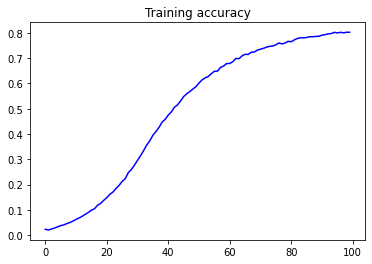

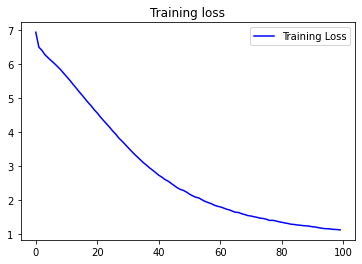

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [19]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope unseen with crime bow doom and praises still abhor no ill spent ill ill ill ' ' die straight grow days write it hate by me good day truly write her rare ' write it so before still ever from thee die things fell words appear words grow days again so ' are now made another grow new kill me days for thee be me press none bring her rare rare rare bright so rare lie to be or me with thee some one ill ill well remain men now room prove thee ' so short new pride ill ill
